In [65]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [66]:
data = pd.read_csv('data.csv')

In [67]:
data.head() # pehle ki 5 rows, diagnosis is output class, 2 types of cancers, these are not required as classification ni krre

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [68]:
data.info() # datset ki puri info, sklearn ka dataset hai ye isme .info() krke fucntion hota

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [69]:
cols_drop = ['id', 'Unnamed: 32']
data = data.drop(cols_drop, axis=1)

In [70]:
data['diagnonis'] = data['diagnosis'].map({'M':1,'B':0})

In [71]:
X = data.drop('diagnosis', axis=1).values # X me drop krkr hai
X = StandardScaler().fit_transform(X)

In [72]:
print(X) # 

[[ 1.09706398 -2.07333501  1.26993369 ...  2.75062224  1.93701461
   1.29767572]
 [ 1.82982061 -0.35363241  1.68595471 ... -0.24388967  0.28118999
   1.29767572]
 [ 1.57988811  0.45618695  1.56650313 ...  1.152255    0.20139121
   1.29767572]
 ...
 [ 0.70228425  2.0455738   0.67267578 ... -1.10454895 -0.31840916
   1.29767572]
 [ 1.83834103  2.33645719  1.98252415 ...  1.91908301  2.21963528
   1.29767572]
 [-1.80840125  1.22179204 -1.81438851 ... -0.04813821 -0.75120669
  -0.77060855]]


In [73]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters= 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Y_Kmeans = kmeans.fit_predict(X) # kmeans isliye lagaya kyunki ye dikhana ki bina PCA lagaye kitta khrb hori clustering

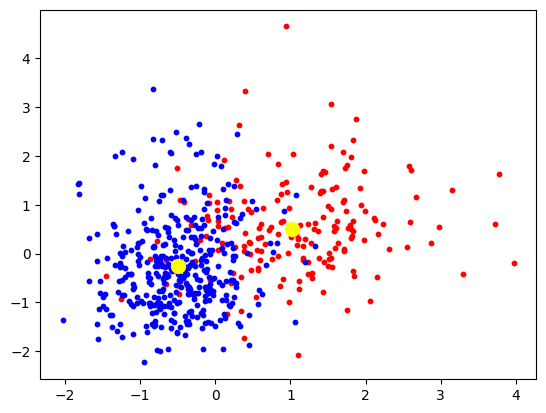

In [74]:
plt.scatter(X[Y_Kmeans == 0, 0], X[Y_Kmeans == 0,1],s = 10, c='red', label = 'Cluster 1')

plt.scatter(X[Y_Kmeans == 1, 0], X[Y_Kmeans == 1,1],s = 10, c='blue', label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

In [75]:
data # As bohot overlap so bohot correlation so correlation kam krna so do PCA

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnonis
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [76]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.75062224,
         1.93701461,  1.29767572],
       [ 1.82982061, -0.35363241,  1.68595471, ..., -0.24388967,
         0.28118999,  1.29767572],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.152255  ,
         0.20139121,  1.29767572],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ..., -1.10454895,
        -0.31840916,  1.29767572],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  1.91908301,
         2.21963528,  1.29767572],
       [-1.80840125,  1.22179204, -1.81438851, ..., -0.04813821,
        -0.75120669, -0.77060855]])

In [77]:
from sklearn.decomposition import PCA

In [78]:
pca = PCA(n_components=2) # 2 hi PC rkhe
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca

array([[ 9.22577011,  2.11619563],
       [ 2.6558016 , -3.78477586],
       [ 5.89249212, -1.00557896],
       ...,
       [ 1.53007727, -1.95887147],
       [10.40500789,  1.84907792],
       [-5.50486158, -0.76634841]])

In [79]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters= 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Y_Kmeans = kmeans.fit_predict(x_pca)

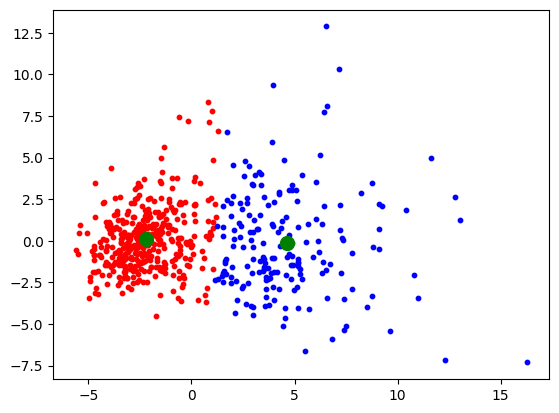

In [81]:
plt.scatter(x_pca[Y_Kmeans == 0, 0], x_pca[Y_Kmeans == 0,1],s = 10, c='red', label = 'Cluster 1')

plt.scatter(x_pca[Y_Kmeans == 1, 0], x_pca[Y_Kmeans == 1,1],s = 10, c='blue', label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'green', label = 'Centroids')